# Visualizing Search Strategies: Maze

__Notes:__

* Breaking ties: 
    * The order in which the children are explored (see `available directions`) makes a big difference for DFS and dealing with empty spaces. I explore the directions in random order which makes the algorithm stochastic!
    * Ties for $h(n)$ and $f(n)$ need to be broken in a consistent manner. I use the most recently added node. To try to keep moving into the same direction.
* Cycles: Cycles are avoided using the reached data structure. For DFS, we can use the reached structure for checking or, without a reached structure implement cycle checking with only parents. 
* Depth-limited search needs ideas from best-first search to work with open spaces!



Helper functions for the Maze Assignment by M. Hahsler
Usage: 
  import maze_helper as mh
  mh.show_some_mazes()
  
Here is an example maze:

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG         XX        X
XXXXXXXXXXXXXXXXXXXXXX

The goal is at (np.int64(8), np.int64(1)).
Position(0,0): X
Position(8,1):  


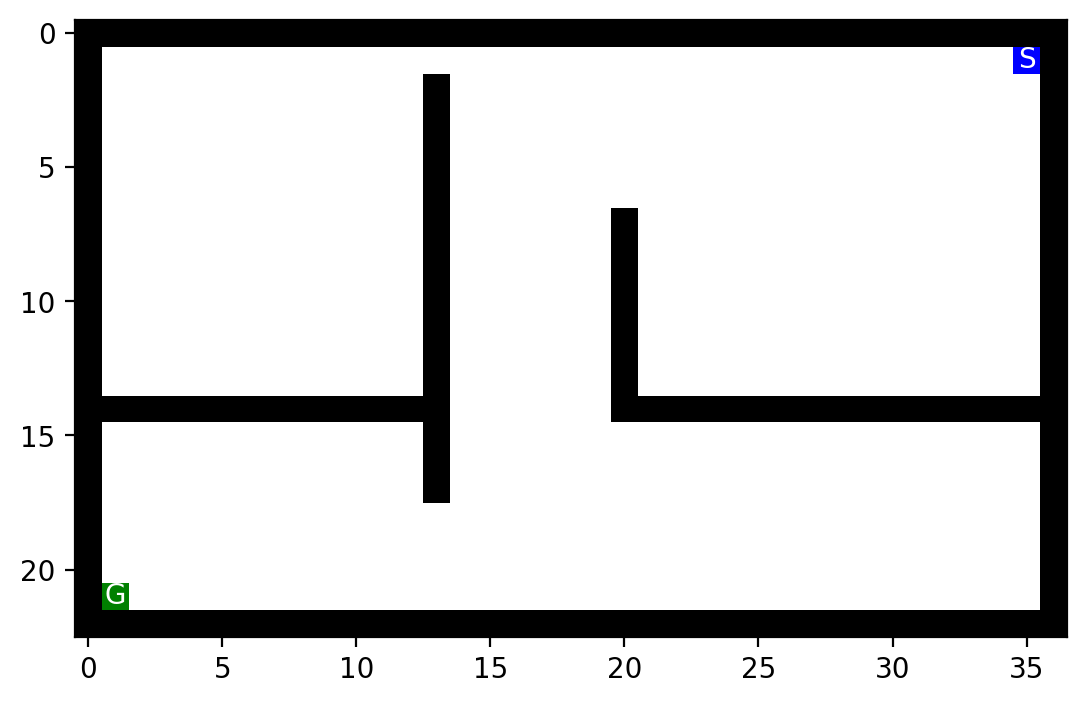

In [1]:
%run maze_helper.py
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np

#f = open("small_maze.txt", "r")
#f = open("medium_maze.txt", "r")
#f = open("large_maze.txt", "r")    # this has only one solution!
f = open("open_maze.txt", "r")
#f = open("empty_maze.txt", "r")
#f = open("empty_2_maze.txt", "r")
#f = open("wall_maze.txt", "r")
#f = open("loops_maze.txt", "r")
#f = open("L_maze.txt", "r")

maze_str = f.read()
maze = parse_maze(maze_str)

# look at two positions in the maze
print("Position(0,0):", maze[0, 0])
print("Position(8,1):", maze[8, 1])

show_maze(maze)

In [2]:
import numpy as np
from matplotlib import colors
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')

# numpy comparison warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def maze_to_matrix(maze):  
    """convert a maze a numeric numpy array for visualization via imshow."""

    # make a deep copy first so the original maze is not changed
    maze = np.copy(maze)
    
    # Converts all tile types to integers
    maze[maze == ' '] = 0
    maze[maze == 'X'] = 1 # wall
    maze[maze == 'S'] = 2 # start
    maze[maze == 'G'] = 3 # goal
    maze[maze == 'P'] = 4 # position/final path
    maze[maze == '.'] = 5 # explored squares
    maze[maze == 'F'] = 6 # frontier
    maze = maze.astype(int)
    
    return(maze)
    
 
# Given a list of mazes, will return an animation of the search
# Based on show_maze but modified to generate animation
# Sadly I can not embed the animations in the PDF I have to submit :(
def animate_maze(result, repeat = False):
        """Build an animation from a list of mazes."""
        
        if result['path'] != None:       
            print(f"Path length: {len(result['path'])-1}")
            print(f"Reached squares: {len(result['reached'])}")
            print(f"Action sequence: {result['actions']}")
        else:
            print("No solution found.")
        
        
        mazes = result['maze_anim']
        
        cmap = colors.ListedColormap(['white', 'black', 'blue', 'green', 'red', 'gray', 'orange'])
 
        goal = find_pos(mazes[0], 'G')
        start = find_pos(mazes[0], 'S')
 
        mazes = [maze_to_matrix(m) for m in mazes]

        fig, ax = plt.subplots()
        im = ax.imshow(maze_to_matrix(mazes[0]), cmap = cmap, norm = colors.BoundaryNorm(list(range(cmap.N + 1)), cmap.N))
 
        plt.text(start[1], start[0], "S", fontsize = 10, color = "white",
                horizontalalignment = 'center',
                verticalalignment = 'center')
 
        plt.text(goal[1], goal[0], "G", fontsize = 10, color = "white",
                horizontalalignment = 'center',
                verticalalignment = 'center')

        def step(i):  
                im.set_array(maze_to_matrix(mazes[i]))
                return([im])
 
        ani = animation.FuncAnimation(
            fig, 
            step, 
            frames = len(mazes),
            repeat = repeat
        )
 
        plt.close()

        return ani


## Implementation

In [3]:
# tree_search.py has my actual implementation
from tree_search_solution import *
import tree_search_solution as tree_search

Directions are checked in the order ['N', 'E', 'S', 'W']


### Heuristics

Heuristics $h(n)$

In [4]:
def manhattan(pos1, pos2):
    """returns the Manhattan distance between two positions"""
    return(np.sum(np.abs(np.subtract(pos1, pos2))))
    
print(manhattan((0,0), (1,1)))

2


In [5]:
def euclidean(pos1, pos2):
    """returns the Euclidean distance between two positions"""
    return(np.sqrt(np.sum(np.square(np.subtract(pos1, pos2)))))

print(euclidean([0,0], [1,1]))

1.4142135623730951


In [6]:
tree_search.heuristic = manhattan
#tree_search.heuristic = euclidean

## Experiments

### BFS

I use a best-first search implementation with FIFO frontier.

In [7]:
tree_search.set_order("NESW")
#tree_search.set_order(random=True)
%time result = best_first_search(maze, strategy = "BFS", debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked in the order ['N', 'E', 'S', 'W']


CPU times: user 109 ms, sys: 17 ms, total: 126 ms
Wall time: 112 ms
Path length: 54
Reached squares: 682
Action sequence: ['S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


RuntimeError: Requested MovieWriter (ffmpeg) not available

In [8]:
#tree_search.set_order("NESW")
tree_search.set_order(random=True)
%time result = best_first_search(maze, strategy = "BFS", debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked at every step in random order.
CPU times: user 126 ms, sys: 804 μs, total: 127 ms
Wall time: 121 ms
Path length: 54
Reached squares: 683
Action sequence: ['S', 'S', 'W', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'S', 'S', 'W', 'W', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'S', 'W', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


RuntimeError: Requested MovieWriter (ffmpeg) not available

The order in which we add to the frontier in the expand function makes no difference for BFS.

### DFS with no reached data structure

This has space complexity $O(bm)$ instead of $O(b^m)$ when we reuse the tree search algorithm from BFS!

Since we cannot check all cycles, we still may get infinite loops. Here are possible solutions:
* Stop after a fixed number of tries and return no solution `max_tries`.
* IDS solves this problem.

In [9]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!

# Can get stuck for empty maze since cycle checking is not strong enough! 
# I use a maximum number of tries and stop if the goal is not reached.
tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
#tree_search.set_order(random=True)

%time result = DFS(maze, vis = False, max_tries = 100000, debug_reached = True, animation = True)

animate_maze(result)

Directions are checked in the order ['N', 'E', 'S', 'W']
CPU times: user 25.6 ms, sys: 17.9 ms, total: 43.5 ms
Wall time: 37.3 ms
Path length: 54
Reached squares: 275
Action sequence: ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'S']


RuntimeError: Requested MovieWriter (ffmpeg) not available

In [10]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!

# I use a maximum number of tries and stop if the goal is not reached.
#tree_search.set_order("NESW")
tree_search.set_order("ENWS")
#tree_search.set_order("WSEN")
#tree_search.set_order(random=True)

%time result = DFS(maze, vis = False, max_tries = 100000, debug_reached = True, animation = True)

animate_maze(result)

Directions are checked in the order ['E', 'N', 'W', 'S']
CPU times: user 6.35 ms, sys: 220 μs, total: 6.57 ms
Wall time: 5.2 ms
Path length: 68
Reached squares: 140
Action sequence: ['S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'W', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


RuntimeError: Requested MovieWriter (ffmpeg) not available

In [11]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!

# Can get stuck for empty maze since cycle checking is not strong enough! 
# I use a maximum number of tries and stop if the goal is not reached.
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
tree_search.set_order(random=True)

%time result = DFS(maze, vis = False, max_tries = 100000, debug_reached = True, animation = True)

animate_maze(result)

Directions are checked at every step in random order.
CPU times: user 68.6 ms, sys: 4.7 ms, total: 73.3 ms
Wall time: 63.2 ms
Path length: 226
Reached squares: 493
Action sequence: ['W', 'W', 'S', 'W', 'W', 'W', 'N', 'W', 'W', 'S', 'E', 'S', 'E', 'S', 'W', 'W', 'S', 'E', 'S', 'S', 'E', 'E', 'E', 'N', 'E', 'E', 'E', 'S', 'S', 'W', 'S', 'S', 'W', 'W', 'N', 'N', 'W', 'W', 'S', 'S', 'E', 'S', 'S', 'E', 'S', 'W', 'W', 'N', 'W', 'W', 'W', 'W', 'N', 'N', 'W', 'S', 'S', 'S', 'W', 'N', 'N', 'W', 'S', 'W', 'N', 'W', 'N', 'N', 'E', 'N', 'W', 'N', 'N', 'N', 'E', 'E', 'S', 'E', 'E', 'E', 'S', 'S', 'W', 'W', 'W', 'S', 'E', 'E', 'E', 'E', 'E', 'E', 'N', 'W', 'N', 'N', 'W', 'N', 'W', 'N', 'E', 'N', 'W', 'N', 'N', 'W', 'W', 'S', 'S', 'W', 'S', 'W', 'W', 'N', 'W', 'W', 'N', 'N', 'W', 'S', 'S', 'W', 'W', 'W', 'W', 'S', 'S', 'E', 'N', 'E', 'E', 'E', 'E', 'S', 'E', 'S', 'W', 'W', 'N', 'W', 'W', 'S', 'S', 'W', 'S', 'E', 'S', 'E', 'S', 'E', 'N', 'E', 'S', 'S', 'S', 'W', 'W', 'S', 'S', 'W', 'N', 'N', 'W', 'W'

RuntimeError: Requested MovieWriter (ffmpeg) not available

The order in which we expand the frontier makes a big difference for DFS. However, the best order depends on the maze.
Randomization with multiple restarts is probably a good idea.


We could do a random walk and not check for cycles. This is guaranteed to reach eventually any square including the goal, 
but creates a long path. The path could be simplified leading to the [Tremaux's algorithm](https://en.wikipedia.org/wiki/Maze_solving_algorithm).

### Run randomized DFS multiple times and use the best solution.

__Note:__ IDS takes a similar amount of time and memory, but is guaranteed optimal.

Directions are checked at every step in random order.
CPU times: user 1.61 s, sys: 21.4 ms, total: 1.63 s
Wall time: 4.42 s
Solutions have path_lengths of [158, 180, 180, 188, 240, 250, 222, 246, 128, 212, 244, 212, 246, 166, 216, 138, 232, 204, 232, 194, 232, 238, 194, 246, 196, 210, 218, 180, 230, 192, 150, 188, 214, 168, 200, 206, 172, 158, 232, 182, 178, 130, 208, 274, 214, 168, 232, 268, 180, 126, 152, 236, 248, 180, 176, 160, 170, 224, 184, 180, 222, 198, 218, 180, 216, 178, 186, 154, 224, 178, 246, 178, 182, 246, 192, 142, 176, 222, 152, 200, 182, 210, 152, 266, 154, 244, 266, 208, 294, 300, 232, 204, 162, 244, 170, 222, 170, 208, 180, 204]
Path length: 126
Reached squares: 0


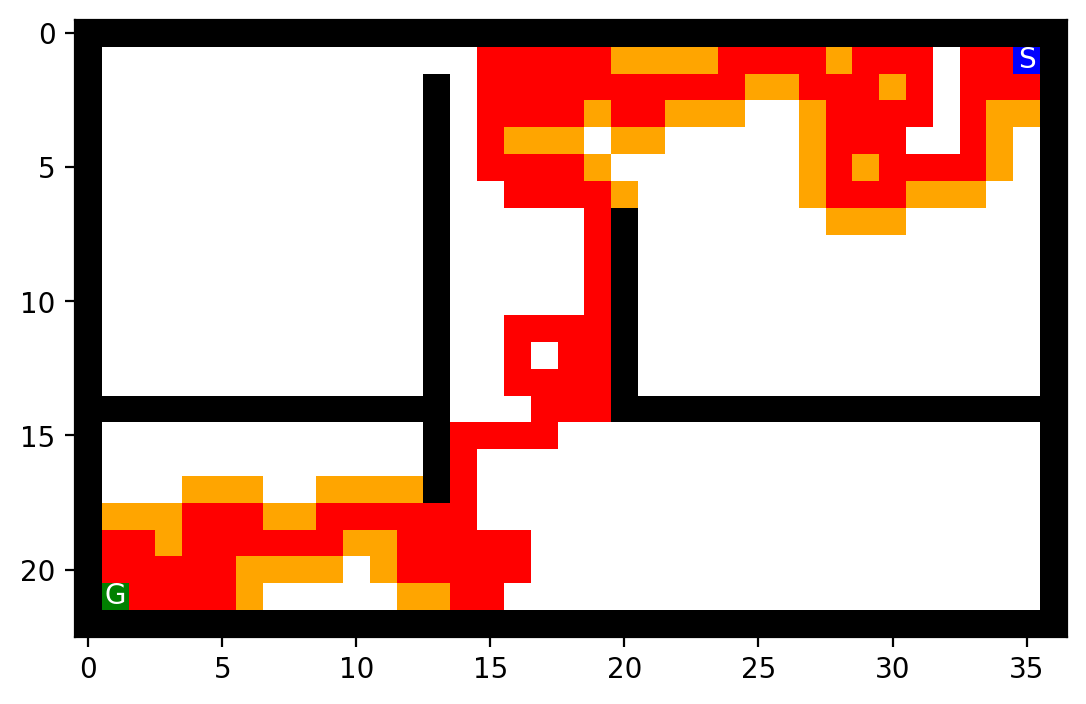

In [12]:
tree_search.set_order(random = True)

N = 100
%time results = [ DFS(maze, max_tries = 10000, vis = False) for _ in range(N) ]

# check if we found a solution and display the best solution
results = [ r for r in results if not r['path'] is None ]
if len(results) > 0:
    path_lengths = [ len(r['path'])-1 for r in results ]

    print(f"Solutions have path_lengths of {path_lengths}")

    result = results[min_index(path_lengths)]
    show_path(maze, result)
else:
    print("No solution found!")

### Depth limited DFS

DFS does not store the explored search tree for visualization so we show it using the tree search implementation.

In [13]:
tree_search.set_order(random = True)

#%time result = DFS(maze, limit = 10, debug = False, vis = False)
%time result = best_first_search(maze, strategy = "DFS", limit = 5, debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked at every step in random order.
CPU times: user 1.75 ms, sys: 140 μs, total: 1.89 ms
Wall time: 1.53 ms
No solution found.


RuntimeError: Requested MovieWriter (ffmpeg) not available

Directions are checked in the order ['N', 'E', 'S', 'W']
CPU times: user 1.98 ms, sys: 0 ns, total: 1.98 ms
Wall time: 1.53 ms
Reached squares: 17


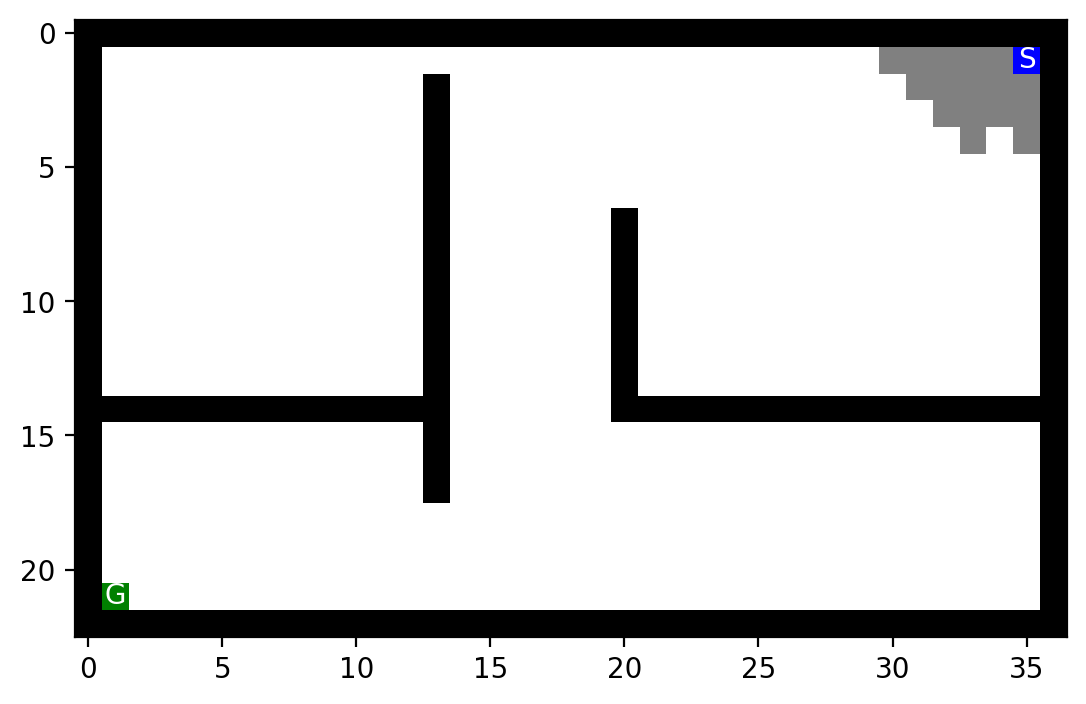

No solution found.


RuntimeError: Requested MovieWriter (ffmpeg) not available

In [14]:
#tree_search.set_order(random=True)
tree_search.set_order("NESW")

%time result = DFS(maze, limit = 5, vis = False, debug_reached = True, animation = True)

show_path(maze, result)

animate_maze(result)

### IDS

__Notes:__ 

* IDS with DFS does not store reached squares, so gray areas are not shown!

* IDS depends on the cycle checking of DFS and therefore is also affected by these problems.

Directions are checked at every step in random order.
CPU times: user 1.9 s, sys: 4.53 ms, total: 1.91 s
Wall time: 1.75 s
Path length: 124
Reached squares: 0


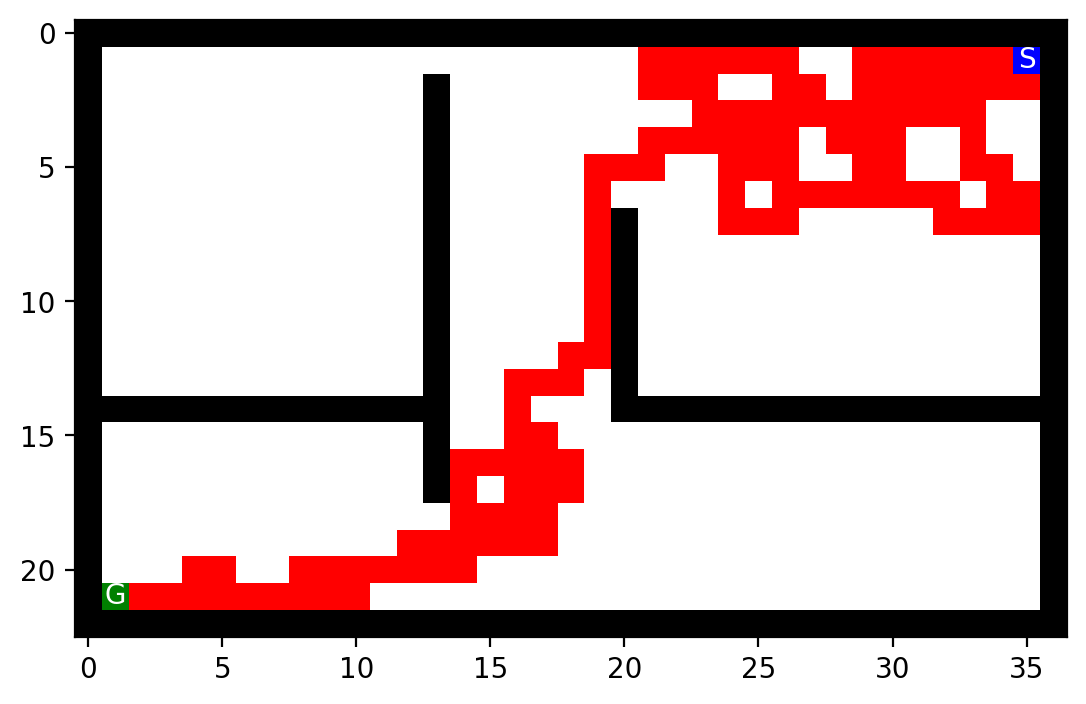

In [15]:
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
tree_search.set_order(random = True)

%time result = IDS(maze, max_tries = 100000)
show_path(maze, result)

Directions are checked at every step in random order.
CPU times: user 1.31 s, sys: 4.32 ms, total: 1.31 s
Wall time: 1.2 s
Path length: 54
Reached squares: 682


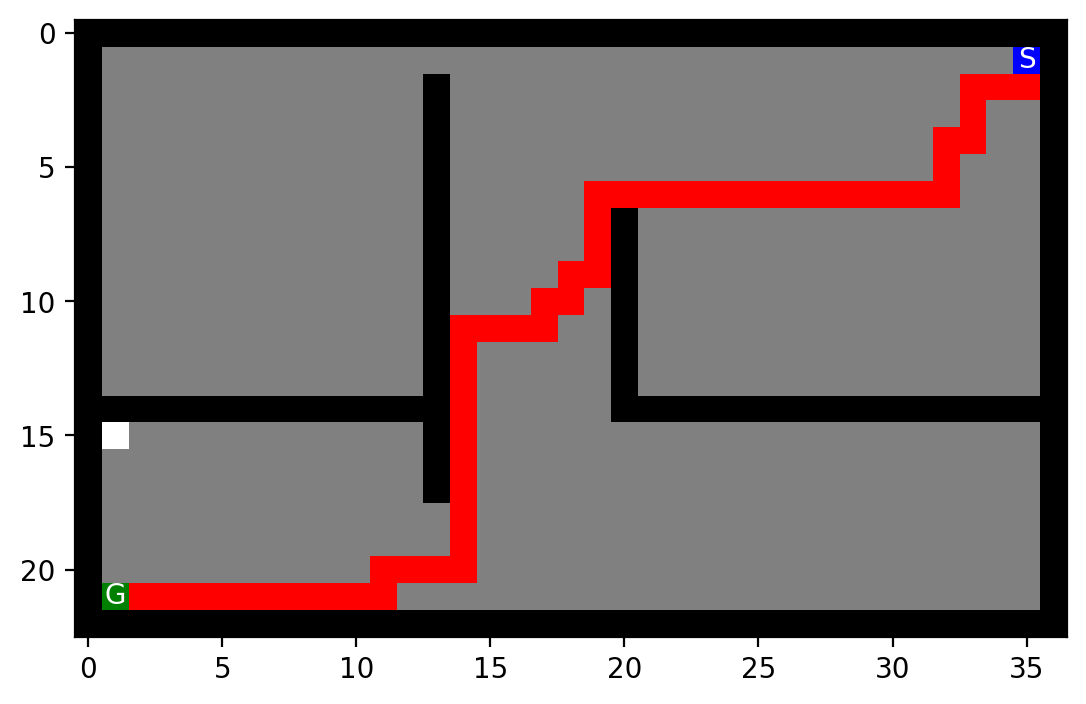

In [16]:
# Use a reached structure. This does not use DFS in the proper way.

#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
tree_search.set_order(random = True)

%time result = IDS_reached(maze, debug = False)
show_path(maze, result)

### GBFS

In [17]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
#tree_search.set_order(random=True)

%time result = best_first_search(maze, strategy = "GBFS", debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked in the order ['S', 'E', 'N', 'W']
CPU times: user 127 ms, sys: 9 ms, total: 136 ms
Wall time: 118 ms
Path length: 54
Reached squares: 273
Action sequence: ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'S']


RuntimeError: Requested MovieWriter (ffmpeg) not available

In [18]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
tree_search.set_order("WSEN")
#tree_search.set_order(random=True)

%time result = best_first_search(maze, strategy = "GBFS", debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked in the order ['W', 'S', 'E', 'N']
CPU times: user 12 ms, sys: 172 μs, total: 12.2 ms
Wall time: 10.1 ms
Path length: 68
Reached squares: 153
Action sequence: ['S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'W', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


RuntimeError: Requested MovieWriter (ffmpeg) not available

In [19]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
tree_search.set_order(random = True)

%time result = best_first_search(maze, strategy = "GBFS", debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked at every step in random order.
CPU times: user 15.5 ms, sys: 0 ns, total: 15.5 ms
Wall time: 12.9 ms
Path length: 66
Reached squares: 158
Action sequence: ['S', 'S', 'W', 'W', 'S', 'S', 'S', 'W', 'S', 'S', 'W', 'S', 'S', 'W', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'N', 'N', 'N', 'N', 'N', 'N', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'S', 'S', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


RuntimeError: Requested MovieWriter (ffmpeg) not available

### A* Search

In [20]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
#tree_search.set_order(random=True)

%time result = best_first_search(maze, strategy = "A*", debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked in the order ['S', 'E', 'N', 'W']
CPU times: user 35 ms, sys: 4.38 ms, total: 39.4 ms
Wall time: 33.4 ms
Path length: 54
Reached squares: 273
Action sequence: ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'S']


RuntimeError: Requested MovieWriter (ffmpeg) not available

In [21]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
tree_search.set_order("WSEN")
#tree_search.set_order(random = True)

%time result = best_first_search(maze, strategy = "A*", debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked in the order ['W', 'S', 'E', 'N']
CPU times: user 31.9 ms, sys: 66 μs, total: 31.9 ms
Wall time: 27.2 ms
Path length: 54
Reached squares: 216
Action sequence: ['S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


RuntimeError: Requested MovieWriter (ffmpeg) not available

In [22]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
tree_search.set_order(random = True)

%time result = best_first_search(maze, strategy = "A*", debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked at every step in random order.
CPU times: user 21 ms, sys: 0 ns, total: 21 ms
Wall time: 18 ms
Path length: 54
Reached squares: 194
Action sequence: ['S', 'S', 'W', 'S', 'W', 'S', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'S', 'S', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'S', 'W', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


RuntimeError: Requested MovieWriter (ffmpeg) not available

### Weighted A* Search

$W > 1$ tends towards GBFS (optimality is not guaranteed)

In [23]:
tree_search.set_order(random=True)

%time result = best_first_search(maze, strategy = "A*", W = 1+1e-9, debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked at every step in random order.
CPU times: user 26.1 ms, sys: 4.37 ms, total: 30.4 ms
Wall time: 28.5 ms
Path length: 54
Reached squares: 184
Action sequence: ['W', 'W', 'W', 'W', 'S', 'S', 'S', 'S', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'S', 'W', 'W', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


RuntimeError: Requested MovieWriter (ffmpeg) not available

In [24]:
%time result = best_first_search(maze, strategy = "A*", W = 2, debug = False, vis = False, animation = True)

animate_maze(result)

CPU times: user 33.4 ms, sys: 145 μs, total: 33.6 ms
Wall time: 29.1 ms
Path length: 60
Reached squares: 176
Action sequence: ['S', 'S', 'S', 'W', 'W', 'S', 'W', 'S', 'W', 'S', 'S', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'N', 'N', 'N', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'W', 'S', 'S', 'W', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


RuntimeError: Requested MovieWriter (ffmpeg) not available

In [25]:
%time result = best_first_search(maze, strategy = "A*", W = 1000, debug = False, vis = False, animation = True)

animate_maze(result)

CPU times: user 20.8 ms, sys: 175 μs, total: 21 ms
Wall time: 16.7 ms
Path length: 60
Reached squares: 161
Action sequence: ['S', 'W', 'W', 'S', 'W', 'S', 'S', 'S', 'W', 'S', 'W', 'W', 'W', 'W', 'S', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'N', 'N', 'N', 'W', 'W', 'S', 'S', 'S', 'W', 'W', 'S', 'S', 'W', 'W', 'S', 'S', 'S', 'S', 'S', 'W', 'S', 'S', 'W', 'S', 'S', 'W', 'W', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


RuntimeError: Requested MovieWriter (ffmpeg) not available

$W<1$ tends towards Uniform-Cost Search/BFS (optimality is guaranteed)

In [26]:
%time result = best_first_search(maze, strategy = "A*", W = 1-1e-9, debug = False, vis = False, animation = True)

animate_maze(result)

CPU times: user 93.4 ms, sys: 4.45 ms, total: 97.8 ms
Wall time: 86.4 ms
Path length: 54
Reached squares: 554
Action sequence: ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'S', 'W', 'S', 'W', 'S', 'W', 'S', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'S', 'W', 'S', 'W', 'S', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'S', 'W', 'S']


RuntimeError: Requested MovieWriter (ffmpeg) not available

In [27]:
%time result = best_first_search(maze, strategy = "A*", W = .1, debug = False, vis = False, animation = True)

animate_maze(result)

CPU times: user 139 ms, sys: 168 μs, total: 139 ms
Wall time: 125 ms
Path length: 54
Reached squares: 679
Action sequence: ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'S', 'S', 'W', 'S', 'W', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'S', 'W', 'S', 'S', 'W', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'W', 'S', 'W', 'S']


RuntimeError: Requested MovieWriter (ffmpeg) not available